In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv


In [2]:
widsDf_train = pd.read_csv("/kaggle/input/widsdatathon2022/train.csv")
widsDf_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
widsDf_train.shape

(75757, 64)

In [4]:
widsDf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
widsDf_train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
widsDf_train.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [7]:
[(column, widsDf_train[column].isna().sum()) for column in widsDf_train.columns if widsDf_train[column].isna().sum() > 0]

[('year_built', 1837),
 ('energy_star_rating', 26709),
 ('direction_max_wind_speed', 41082),
 ('direction_peak_wind_speed', 41811),
 ('max_wind_speed', 41082),
 ('days_with_fog', 45796)]

In [8]:
#widsDf.drop(["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"], inplace=True, axis=1)

new_wids_df_train = widsDf_train[['Year_Factor','State_Factor','building_class','facility_type','floor_area','year_built', 'energy_star_rating', 'ELEVATION', 'site_eui']]

In [9]:
new_wids_df_train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'site_eui'],
      dtype='object')

In [10]:
widsDf_test = pd.read_csv("/kaggle/input/widsdatathon2022/test.csv")
widsDf_test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [11]:
widsDf_test.shape

(9705, 63)

In [12]:
widsDf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [13]:
widsDf_test.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [14]:
[(column, widsDf_test[column].isna().sum()) for column in widsDf_test.columns if widsDf_test[column].isna().sum() > 0]

[('year_built', 92),
 ('energy_star_rating', 2254),
 ('direction_max_wind_speed', 8575),
 ('direction_peak_wind_speed', 8575),
 ('max_wind_speed', 8575),
 ('days_with_fog', 9117)]

In [15]:
new_wids_df_test = widsDf_test[['Year_Factor','State_Factor','building_class','facility_type','floor_area','year_built', 'energy_star_rating', 'ELEVATION']]

In [16]:
new_wids_df_test.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION'],
      dtype='object')

In [17]:
new_wids_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Factor         75757 non-null  int64  
 1   State_Factor        75757 non-null  object 
 2   building_class      75757 non-null  object 
 3   facility_type       75757 non-null  object 
 4   floor_area          75757 non-null  float64
 5   year_built          73920 non-null  float64
 6   energy_star_rating  49048 non-null  float64
 7   ELEVATION           75757 non-null  float64
 8   site_eui            75757 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 5.2+ MB


In [18]:
new_wids_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Factor         9705 non-null   int64  
 1   State_Factor        9705 non-null   object 
 2   building_class      9705 non-null   object 
 3   facility_type       9705 non-null   object 
 4   floor_area          9705 non-null   float64
 5   year_built          9613 non-null   float64
 6   energy_star_rating  7451 non-null   float64
 7   ELEVATION           9705 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 606.7+ KB


In [19]:
new_wids_df_train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,site_eui
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,82.584693
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,58.255403
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,1.001169
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,54.528601
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,75.293716
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,97.277534
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,997.866120


In [20]:
new_wids_df_test.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190
std,0.0,2.624759e+05,40.819953,27.935984,264.822814
min,7.0,5.982000e+03,0.000000,1.000000,1.800000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000


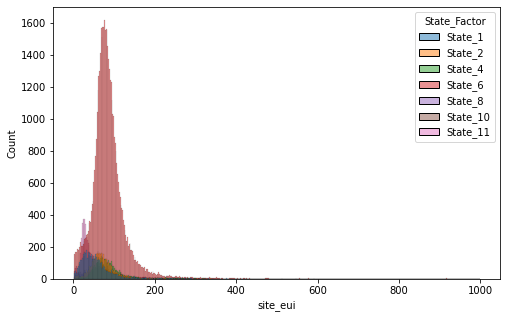

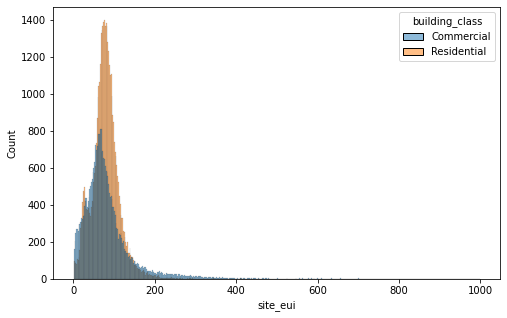

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(data = new_wids_df_train, x = "site_eui",hue='State_Factor')

plt.figure(figsize=(8,5))
sns.histplot(data = new_wids_df_train, x = "site_eui",hue='building_class')
plt.show()

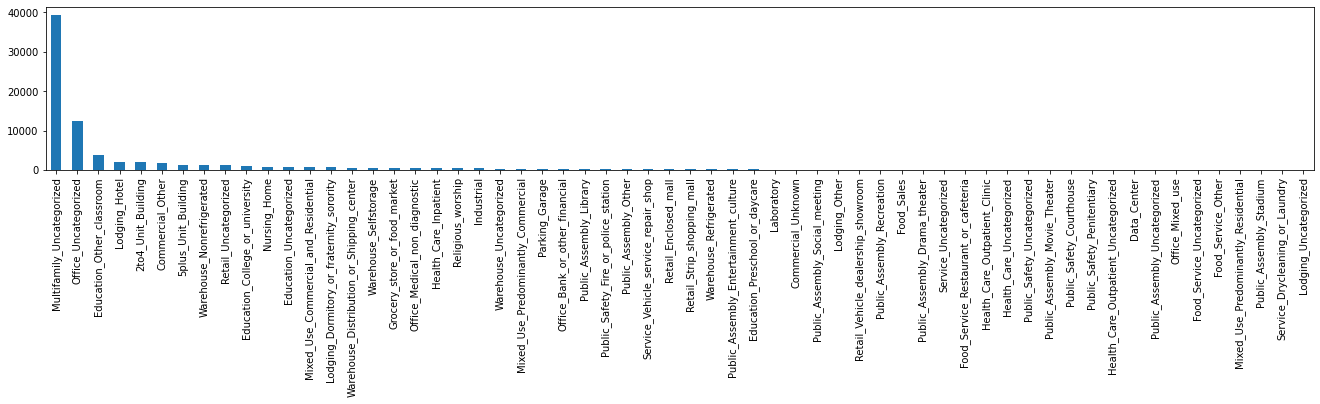

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,3))
plt.subplot(1, 2, 1)
new_wids_df_train['facility_type'].value_counts().plot(kind='bar')
plt.show()

In [23]:
new_wids_df_train['facility_type'].value_counts()


Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

In [24]:
new_wids_df_test['facility_type'].value_counts()

Multifamily_Uncategorized                    2199
Office_Uncategorized                         1919
2to4_Unit_Building                            966
Education_Other_classroom                     890
5plus_Unit_Building                           685
Lodging_Hotel                                 367
Commercial_Other                              325
Retail_Uncategorized                          225
Education_College_or_university               202
Mixed_Use_Commercial_and_Residential          193
Warehouse_Uncategorized                       157
Nursing_Home                                  151
Grocery_store_or_food_market                  135
Religious_worship                             125
Warehouse_Nonrefrigerated                     110
Office_Medical_non_diagnostic                 100
Lodging_Dormitory_or_fraternity_sorority       99
Warehouse_Distribution_or_Shipping_center      94
Warehouse_Selfstorage                          80
Health_Care_Inpatient                          76


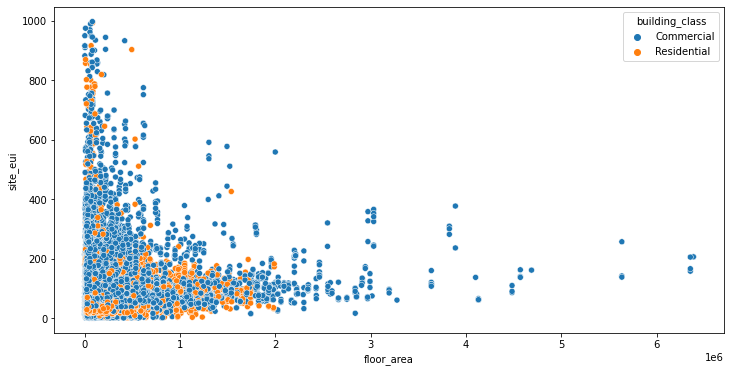

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_wids_df_train,x='floor_area',hue='building_class',y='site_eui')
plt.show()

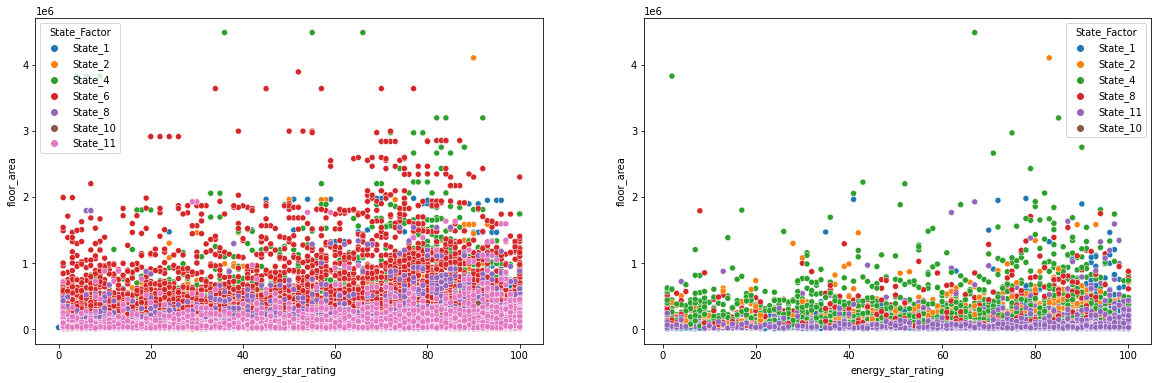

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=new_wids_df_train,y='floor_area',hue='State_Factor',x='energy_star_rating')

plt.subplot(1,2,2)
sns.scatterplot(data=new_wids_df_test,y='floor_area',hue='State_Factor',x='energy_star_rating')
plt.show()

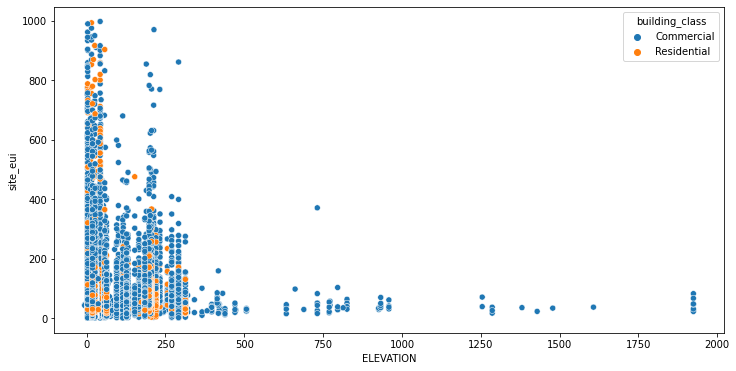

In [27]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=new_wids_df_train, x="ELEVATION", y="site_eui",hue='building_class')
plt.show()

In [28]:
new_wids_df_train['State_Factor'].value_counts()

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

In [29]:
new_wids_df_test['State_Factor'].value_counts()

State_11    3268
State_4     2568
State_2     1515
State_8     1323
State_1     1027
State_10       4
Name: State_Factor, dtype: int64

In [30]:
new_wids_df_train['building_class'].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [31]:
new_wids_df_test['building_class'].value_counts()

Commercial     5607
Residential    4098
Name: building_class, dtype: int64

In [32]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
for col in ['State_Factor','building_class', 'facility_type']:
    label_encoder = preprocessing.LabelEncoder()
    # Encode labels in column 'Country'. 
    label_encoder.fit(new_wids_df_train[col])
    new_wids_df_train[col] = label_encoder.transform(new_wids_df_train[col])
    new_wids_df_test[col]= label_encoder.transform(new_wids_df_test[col])

new_wids_df_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,site_eui
0,1,0,0,13,61242.0,1942.0,11.0,2.4,248.682615
1,1,0,0,55,274000.0,1955.0,45.0,1.8,26.500150
2,1,0,0,48,280025.0,1951.0,97.0,1.8,24.693619
3,1,0,0,6,55325.0,1980.0,46.0,1.8,48.406926
4,1,0,0,56,66000.0,1985.0,100.0,2.4,3.899395


In [33]:
new_wids_df_test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION
0,7,0,0,13,28484.0,1994.0,37.0,2.4
1,7,0,0,13,21906.0,1961.0,55.0,45.7
2,7,0,0,13,16138.0,1950.0,1.0,59.1
3,7,0,0,13,97422.0,1971.0,34.0,35.4
4,7,0,0,13,61242.0,1942.0,35.0,1.8


In [34]:
new_wids_df_train_corr=new_wids_df_train.corr()
new_wids_df_train_corr.style.background_gradient(cmap="cool")

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,site_eui
Year_Factor,1.000000,-0.096798,-0.026198,-0.120038,-0.036363,0.084143,-0.005052,0.132855,-0.045179
State_Factor,-0.096798,1.000000,0.288096,0.119659,0.061200,-0.040046,-0.141180,-0.114672,0.165703
building_class,-0.026198,0.288096,1.000000,-0.092227,-0.133585,0.013305,-0.110104,-0.156844,-0.046794
facility_type,-0.120038,0.119659,-0.092227,1.000000,0.057915,-0.051784,0.008912,-0.082764,-0.043189
floor_area,-0.036363,0.061200,-0.133585,0.057915,1.000000,0.100878,0.034947,0.097797,0.073967
year_built,0.084143,-0.040046,0.013305,-0.051784,0.100878,1.000000,-0.073857,0.047803,0.017162
energy_star_rating,-0.005052,-0.141180,-0.110104,0.008912,0.034947,-0.073857,1.000000,-0.016783,-0.511012
ELEVATION,0.132855,-0.114672,-0.156844,-0.082764,0.097797,0.047803,-0.016783,1.000000,0.011798
site_eui,-0.045179,0.165703,-0.046794,-0.043189,0.073967,0.017162,-0.511012,0.011798,1.000000


<AxesSubplot:>

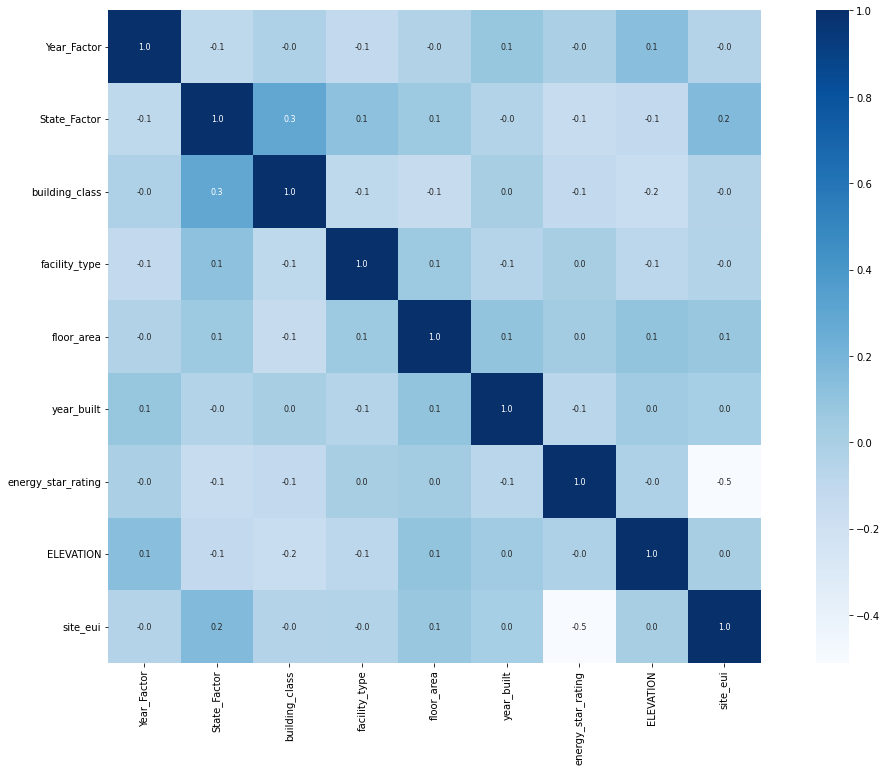

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# constructing heap to see correlation
plt.figure(figsize=(20,12))
sns.heatmap(new_wids_df_train_corr, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [36]:
features = new_wids_df_train.drop('site_eui',axis=1)
outputLabel = new_wids_df_train['site_eui'] 

In [37]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Imputation transformer for completing missing values.
imp_mean.fit(features)
features = imp_mean.transform(features)
features = pd.DataFrame(features)
features_test = imp_mean.transform(new_wids_df_test)
features_test = pd.DataFrame(features_test)
features.head

<bound method NDFrame.head of          0    1    2     3         4       5           6     7
0      1.0  0.0  0.0  13.0   61242.0  1942.0   11.000000   2.4
1      1.0  0.0  0.0  55.0  274000.0  1955.0   45.000000   1.8
2      1.0  0.0  0.0  48.0  280025.0  1951.0   97.000000   1.8
3      1.0  0.0  0.0   6.0   55325.0  1980.0   46.000000   1.8
4      1.0  0.0  0.0  56.0   66000.0  1985.0  100.000000   2.4
...    ...  ...  ...   ...       ...     ...         ...   ...
75752  6.0  2.0  0.0  32.0   20410.0  1995.0    8.000000  36.6
75753  6.0  2.0  1.0   1.0   40489.0  1910.0   98.000000  36.6
75754  6.0  2.0  0.0   2.0   28072.0  1917.0   61.048605  36.6
75755  6.0  2.0  0.0   2.0   53575.0  2012.0   61.048605  36.6
75756  6.0  2.0  1.0   0.0   23888.0  1974.0   51.000000  36.6

[75757 rows x 8 columns]>

In [38]:
# define min max scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaler.fit(features)
scaled = scaler.transform(features)
scaled_test = scaler.transform(features_test)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, outputLabel, test_size=0.25, random_state=46)

In [40]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)


In [41]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
rmse

53.403569291842686

In [42]:
import xgboost

xgboost_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.03, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=3)
xgboost_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
predictions = xgboost_model.predict(X_test)
mse_xg = sklearn.metrics.mean_squared_error(y_test,predictions)
rmse_xg = math.sqrt(mse_xg)
rmse_xg

49.85425807108219

In [44]:
# from sklearn.model_selection import GridSearchCV
# xgb = xgboost.XGBRegressor()
# parameters = {'objective':['reg:linear'],
#               'learning_rate': [.02, .05, 0.01], #so called `eta` value
#               'max_depth': [3,5],
#               'min_child_weight': [4],
#               'subsample': [0.7],
#               'colsample_bytree': [0.4],
#               'n_estimators': [1000],
#               'reg_alpha': [0.4],
#               'reg_lambda': [2e-08]
# }
# xgb_grid = GridSearchCV(xgb,
#                         parameters,
#                         cv = 5,
#                         verbose=True)

# xgb_grid.fit(X_train,y_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [45]:
    
xgboost_mod = xgboost.XGBRegressor(colsample_bytree=0.4, learning_rate= 0.05, max_depth= 5, min_child_weight= 4,
                          n_estimators= 1000, reg_alpha=0.4, reg_lambda=2e-08, subsample= 0.7)
xgboost_mod.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.4, reg_lambda=2e-08, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
predictions_mod = xgboost_mod.predict(X_test)
mse_xg = sklearn.metrics.mean_squared_error(y_test,predictions_mod)
rmse_xg = math.sqrt(mse_xg)
rmse_xg

42.58361236001578

In [47]:
pred_test = xgboost_mod.predict(scaled_test)
SAMPLE_SUBMISSION_PATH = "../input/widsdatathon2022/sample_solution.csv"
SUBMISSION_PATH = "submission.csv"
sub = pd.read_csv(SAMPLE_SUBMISSION_PATH)
sub['site_eui'] = pred_test
sub.to_csv(SUBMISSION_PATH,index=False)
sub.head()

,id,site_eui
0,75757,216.599533
1,75758,222.779099
2,75759,366.234528
3,75760,270.133270
4,75761,233.547852
